In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(5)
strings = list('ABC')
events = [strings[i] for i in np.random.randint(0,3,20)]
#groups = list(np.ones((1,11))) + list(2*np.ones((1,9)))
groups = [1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2]
index = pd.date_range('2/2/2012', periods = 20, freq= 'T')
dfm = pd.DataFrame(data={'event':events,'group':groups},index = index)
for i in range(1,4):
    dfm['event_t%i'%i] =dfm.event.groupby(dfm.group).shift(-i)

In [3]:
dfm

,event,group,event_t1,event_t2,event_t3
2012-02-02 00:00:00,C,1,B,C,C
2012-02-02 00:01:00,B,1,C,C,A
2012-02-02 00:02:00,C,1,C,A,B
2012-02-02 00:03:00,C,1,A,B,A
2012-02-02 00:04:00,A,1,B,A,A
2012-02-02 00:05:00,B,1,A,A,C
2012-02-02 00:06:00,A,1,A,C,A
2012-02-02 00:07:00,A,1,C,A,C
2012-02-02 00:08:00,C,1,A,C,NaN
2012-02-02 00:09:00,A,1,C,NaN,NaN


In [4]:
trans = pd.DataFrame(columns=strings, index = strings)
g_dfm = dfm[dfm['group'] ==1]
for s1 in strings:
    for s2 in strings:
        events = g_dfm[(g_dfm['event']==s1) & (g_dfm['event_t1']==s2)]
        trans.ix[s1,s2] = len(events)



D:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [41]:
trans = trans.astype(float).div(trans.sum(axis=1), axis = 0)
trans = trans.fillna(0)

Index(['A', 'B', 'C'], dtype='object')

In [7]:
print(trans)
trans.sum(axis=1)

   A  B  C
A  1  1  2
B  1  0  1
C  2  1  1


A    4
B    2
C    4
dtype: int64

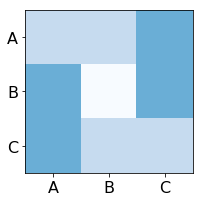

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3,3))
ax.pcolormesh(trans.values, cmap=plt.get_cmap('Blues'),vmin=0, vmax = 1)
ax.invert_yaxis()
ax.set_yticks(np.arange(0,len(trans.index))+0.5)
ax.set_xticks(np.arange(0,len(trans.columns))+0.5)
ax.set_yticklabels(trans.index, fontsize = 16, color = 'k')
ax.set_xticklabels(trans.columns, fontsize = 16, color = 'k')
plt.show()

In [50]:
trans

,A,B,C
A,0.25,0.25,0.50
B,0.50,0.00,0.50
C,0.50,0.25,0.25
